In [80]:
import numpy as np
import pandas as pd

from esc.util import MINUTES_PER_DAY

In [81]:
# Taken from Real-Time LBMP data on 2022-11-20 located here: https://www.nyiso.com/energy-market-operational-data
df = pd.read_csv("../data/20220801realtime_zone.csv")

In [82]:
df

,Time Stamp,Name,PTID,LBMP ($/MWHr),Marginal Cost Losses ($/MWHr),Marginal Cost Congestion ($/MWHr)
0,08/01/2022 00:05:00,CAPITL,61757,65.74,4.76,0.0
1,08/01/2022 00:05:00,CENTRL,61754,62.44,1.46,0.0
2,08/01/2022 00:05:00,DUNWOD,61760,67.44,6.46,0.0
3,08/01/2022 00:05:00,GENESE,61753,62.26,1.28,0.0
4,08/01/2022 00:05:00,H Q,61844,59.15,-1.83,0.0
...,...,...,...,...,...,...
4375,08/02/2022 00:00:00,NORTH,61755,50.75,-2.06,0.0
4376,08/02/2022 00:00:00,NPX,61845,56.45,3.64,0.0
4377,08/02/2022 00:00:00,O H,61846,52.07,-0.74,0.0
4378,08/02/2022 00:00:00,PJM,61847,55.55,2.74,0.0


In [83]:
nyc_df = df.query("Name == 'N.Y.C.'")

In [84]:
start_of_day = pd.to_datetime('2022-08-01T00:00:00')

In [85]:
minute_of_day = (pd.to_datetime(nyc_df["Time Stamp"]) - start_of_day).dt.seconds / 60

In [86]:
price_by_5_minute_of_day = nyc_df.assign(minute_of_day=minute_of_day).set_index("minute_of_day")["LBMP ($/MWHr)"]
price_by_5_minute_of_day = price_by_5_minute_of_day / 1000 # Convert from MWh to KWh
price_by_5_minute_of_day

minute_of_day
5.0       0.06811
10.0      0.06805
15.0      0.06874
20.0      0.06811
25.0      0.06874
           ...   
1420.0    0.05815
1425.0    0.05774
1430.0    0.05757
1435.0    0.05706
0.0       0.05840
Name: LBMP ($/MWHr), Length: 292, dtype: float64

<AxesSubplot: xlabel='minute_of_day'>

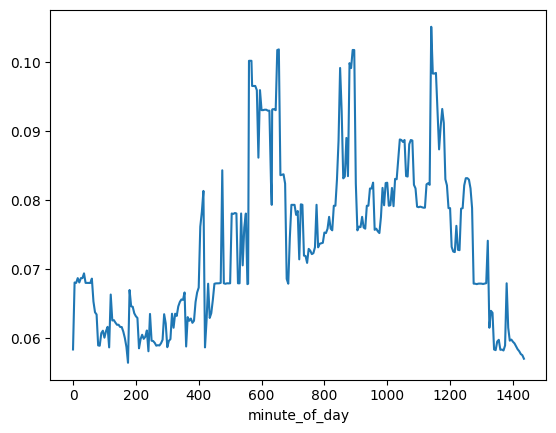

In [87]:
price_by_5_minute_of_day.sort_index(inplace=True)
price_by_5_minute_of_day.plot()

In [88]:
# Interpolate from price for every 5 minute to price for every minute
price_by_minute_of_day = np.interp(
    np.arange(MINUTES_PER_DAY),
    price_by_5_minute_of_day.index.to_numpy(),
    price_by_5_minute_of_day.to_numpy(),
)


<AxesSubplot: >

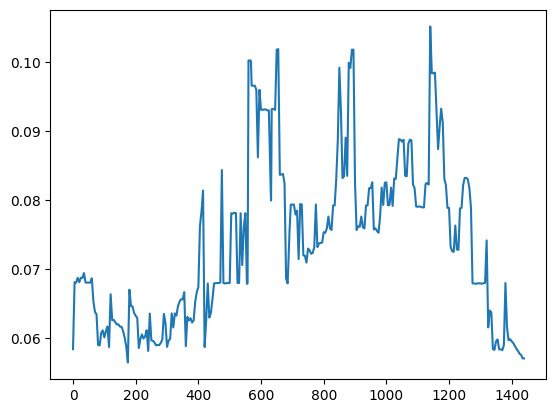

In [92]:
pd.Series(price_by_minute_of_day).plot()

In [93]:
np.save("../data/nyc_price_by_minute_of_day_2022-08-01.npy", price_by_minute_of_day)